In [1]:
import import_ipynb
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from matplotlib import gridspec


import netsci.visualization as nsv
import netsci.metrics.motifs as nsm
import itertools

import graph_functions as gf
import generate_null_models as gn
import motif_analysis as m


import netsci.visualization as nsv

%matplotlib inline

importing Jupyter notebook from graph_functions.ipynb
importing Jupyter notebook from generate_null_models.ipynb
importing Jupyter notebook from motif_analysis.ipynb


# Basic Network Statistics

In [2]:
directed = nx.read_gml('directed.gml')

In [4]:
gf.print_statistics(directed)

Number of nodes:  2139
Number of edges:  6019

Average degree:  5.627863487611033
Average degree (alternate calculation) 5.627863487611033

Minimum degree:  1
Maximum degree:  36
Average Clustering Coefficient:  0.033024296572043026


### Connected Components

In [5]:
# Number of connected components
connected_components = gf.get_size_of__each_connected_components(directed)
print("The number of connected components in our graph is", len(connected_components))
print("With the largest connected component having a total of", connected_components[0], "nodes")

The number of connected components in our graph is 25
With the largest connected component having a total of 1909 nodes


### Degree Distribution(s)

1
36


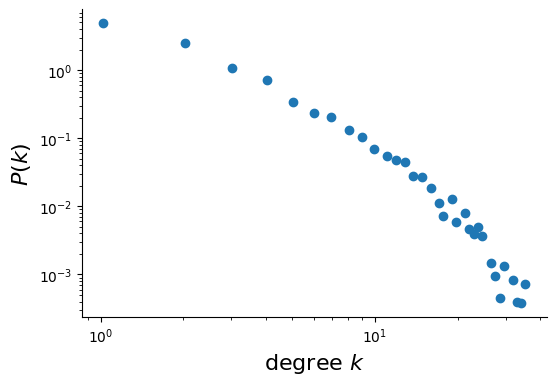

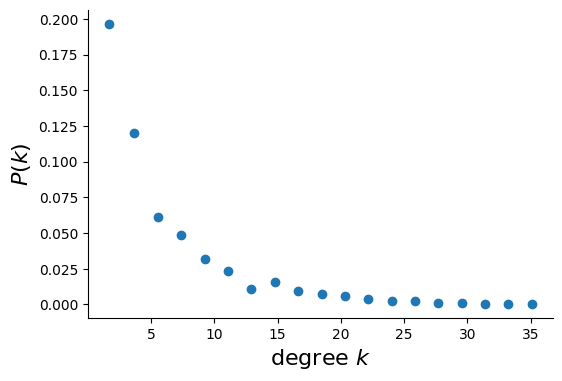

In [6]:
# Degree Distribution logarithmic and linear
gf.plot_degree_dist(directed, 100)
gf.plot_degree_dist_lin(directed, 20)

1
36
gamma=  1.7544887391651014


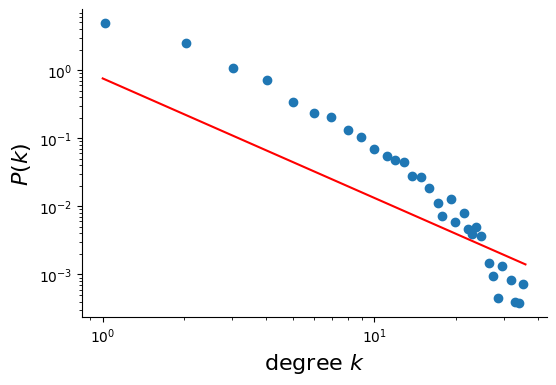

In [7]:
# Degree Distribution with fit
gf.plot_degree_dist(directed, 100, True)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
gamma=  10.229719645100136
Calculating best minimal value for power law fit
gamma=  5.051762045179266


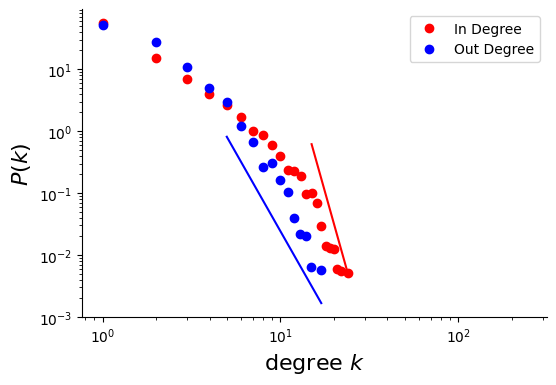

In [8]:
# plot the in-degree and out-degree distributions
gf.plot_in_and_out_degree_dist(directed, 1000, True)

### Path Length and Clustering Coefficient
Since our graph contains 25 connected components, we cannot determine the average path lenght of the original graph. To calculate this, we will determin the average path lenght of the two largest connected components; the mens and womens division

In [4]:
mens_division_directed = gf.get_largest_subgraph(directed)
womens_division_directed = gf.get_second_largest_subgraph(directed)

In [5]:
# Basic statistics of the mens division
gf.print_statistics(mens_division_directed)

Number of nodes:  1909
Number of edges:  5521

Average degree:  5.784180199057098
Average degree (alternate calculation) 5.784180199057098

Minimum degree:  1
Maximum degree:  36
Average Clustering Coefficient:  0.03138819213299309
Average Shortest Path:  3.4736795143384587


gamma=  1.7392386497962327


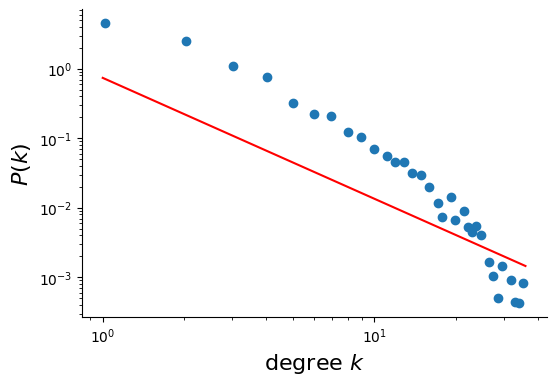

In [7]:
# Degree Distribution with fit
gf.plot_degree_dist(mens_division_directed, 100, True)

In [6]:
# Basic statistics of the womens division
gf.print_statistics(womens_division_directed)

Number of nodes:  181
Number of edges:  471

Average degree:  5.204419889502763
Average degree (alternate calculation) 5.204419889502763

Minimum degree:  1
Maximum degree:  18
Average Clustering Coefficient:  0.05922050599843215
Average Shortest Path:  2.302793124616329


gamma=  1.7263824941972337


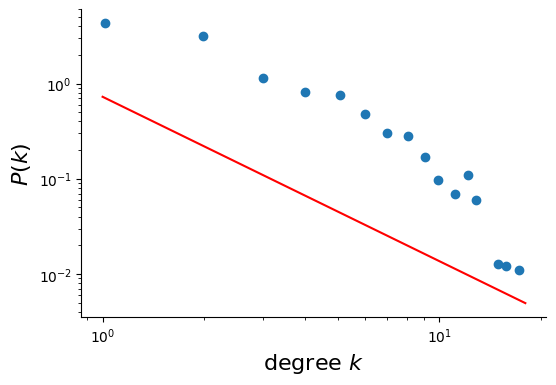

In [8]:
gf.plot_degree_dist(womens_division_directed, 100, True)

## Null Model Compariosn - Basic Network Statistics

In [25]:
# Null model comparison of ERs to entire network
avgkER, cER, sER = gn.generate_N_erdos_renyi(directed, True, 1000)

In [26]:
print("ER null model comparison")
avgkERmean = np.mean(avgkER)
avgkERstd = np.std(avgkER)
print("Average Degree Mean:", avgkERmean, "Standard Deviation:", avgkERstd)

cERmean = np.mean(cER)
cERstd = np.std(cER)
print("Correlation Coefficient Mean:", cERmean, "Standard Deviation:", cERstd)

sERmean = np.mean(sER)
sERstd = np.std(sER)
print("Path Length Mean:", sERmean, "Standard Deviation:", sERstd)

ER null model comparison
Average Degree Mean: 11.2597587657784 Standard Deviation: 0.0987160441998444
Correlation Coefficient Mean: 0.0026226950821891196 Standard Deviation: 0.00019164973389333234
Path Length Mean: 4.595927103939084 Standard Deviation: 0.02283622604177989


1
25


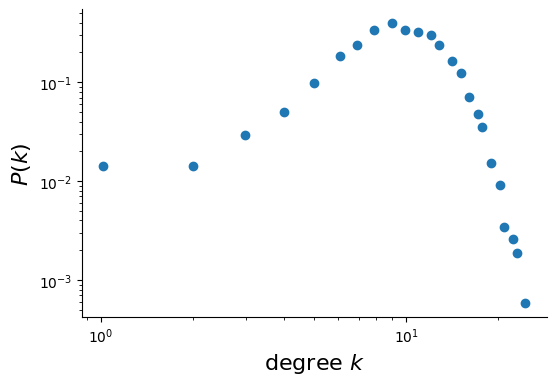

In [11]:
gf.plot_degree_dist(gn.erdos_renyi_graph_from(directed, True), 100, False)

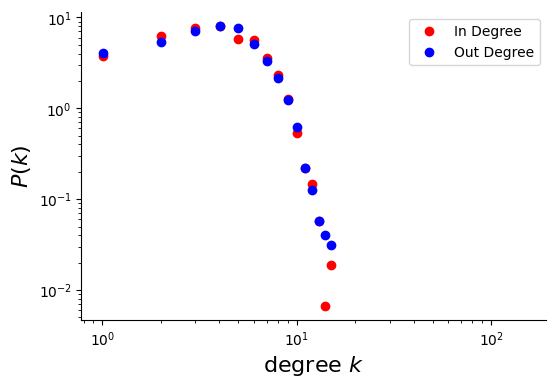

In [22]:
gf.plot_in_and_out_degree_dist(gn.erdos_renyi_graph_from(directed, True), 1000, False)

In [38]:
#np.savetxt("avfkER.txt", avgkER

In [39]:
#np.savetxt("cER.txt", cER)

In [40]:
#np.savetxt("sER.txt", sER)

In [24]:
# Null model comparison of DPs to entire network
avgkDP, cDP, sDP = gn.generate_N_degree_preserving(directed, True, 1000)

In [22]:
print("Degree Preserving null model comparison")
avgkDPmean = np.mean(avgkDP)
avgkDPstd = np.std(avgkDP)
print("Average Degree Mean:", avgkDPmean, "Standard Deviation:", avgkDPstd)

cDPmean = np.mean(cDP)
cDPstd = np.std(cDP)
print("Correlation Coefficient Mean:", cDPmean, "Standard Deviation:", cDPstd)

sDPmean = np.mean(sDP)
sDPstd = np.std(sDP)
print("Path Length Mean:", sDPmean, "Standard Deviation:", sDPstd)

Degree Preserving null model comparison
Average Degree Mean: 5.627863487611032 Standard Deviation: 8.881784197001252e-16
Correlation Coefficient Mean: 0.005199528372821304 Standard Deviation: 0.0007046199405524387
Path Length Mean: nan Standard Deviation: nan


/Users/ammanyusuf/Documents/UofC/CPSC572/project/code/env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ammanyusuf/Documents/UofC/CPSC572/project/code/env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ammanyusuf/Documents/UofC/CPSC572/project/code/env/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ammanyusuf/Documents/UofC/CPSC572/project/code/env/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/ammanyusuf/Documents/UofC/CPSC572/project/code/env/lib/python3.10/site-packages/numpy/core/_methods.py:257: Ru

1
36
gamma=  1.7544887391651014


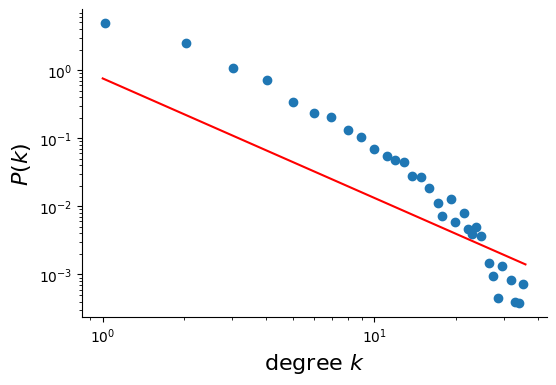

In [13]:
gf.plot_degree_dist(gn.degree_preserving_graph_from(directed, True), 100, True)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
gamma=  10.229719645100136
Calculating best minimal value for power law fit
gamma=  5.051762045179266


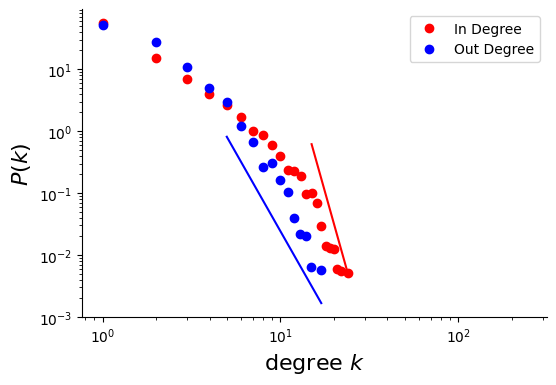

In [21]:
gf.plot_in_and_out_degree_dist(gn.degree_preserving_graph_from(directed, True), 1000, True)

In [41]:
#np.savetxt("avfkDP.txt", avgkDP)
#np.savetxt("cDP.txt", cDP)
#np.savetxt("sDP.txt", sDP)

## Null model comaprison to mens and womens division
We will only compare to the DP model as the original directed graph could not produce a connected, DP model

In [36]:
avgkDPmens, cDPmens, sDPmens = gn.generate_N_degree_preserving(mens_division_directed, True, 1000)

In [38]:
print("Degree Preserving null model comparison")
print("Average Degree Mean:", np.mean(avgkDPmens), "Standard Deviation:", np.std(avgkDPmens))
print("Correlation Coefficient Mean:", np.mean(cDPmens), "Standard Deviation:", np.std(cDPmens))
print("Path Length Mean:", np.mean(sDPmens), "Standard Deviation:", np.std(sDPmens))

Degree Preserving null model comparison
Average Degree Mean: 5.784180199057101 Standard Deviation: 2.6645352591003757e-15
Correlation Coefficient Mean: 0.003948711150586971 Standard Deviation: 0.0006513547793497378
Path Length Mean: 3.171674867641196 Standard Deviation: 0.034546068531326614


In [39]:
#np.savetxt("avfkDPmens.txt", avgkDPmens)
#np.savetxt("cDPmens.txt", cDPmens)
#np.savetxt("sDPmens.txt", sDPmens)

In [35]:
avgkDPwomens, cDPwomens, sDPwomens = gn.generate_N_degree_preserving(womens_division_directed, True, 1000)

In [37]:
print("Degree Preserving null model comparison")
print("Average Degree Mean:", np.mean(avgkDPwomens), "Standard Deviation:", np.std(avgkDPwomens))
print("Correlation Coefficient Mean:", np.mean(cDPwomens), "Standard Deviation:", np.std(cDPwomens))
print("Path Length Mean:", np.mean(sDPwomens), "Standard Deviation:", np.std(sDPwomens))

Degree Preserving null model comparison
Average Degree Mean: 5.20441988950276 Standard Deviation: 2.6645352591003757e-15
Correlation Coefficient Mean: 0.022067030072224075 Standard Deviation: 0.004886254482357149
Path Length Mean: 2.857301473296501 Standard Deviation: 0.11043794210851336


In [40]:
#np.savetxt("avfkDPwomens.txt", avgkDPwomens)
#np.savetxt("cDPwomens.txt", cDPwomens)
#np.savetxt("sDPwomens.txt", sDPwomens)

# Assortativity

In [11]:
print('Degree Correlation Coefficient: ', nx.degree_pearson_correlation_coefficient(directed))

Degree Correlation Coefficient:  0.2617213382949139


In [4]:
corr_coef_ER = gn.generate_N_erdos_renyi_coefficient(directed, True, 1000)

In [5]:
print("ER null model comparison")
corr_coef_ER_mean = np.mean(corr_coef_ER)
corr_coef_ER_std = np.std(corr_coef_ER)
print("Degree Correlation Coefficient Mean:", corr_coef_ER_mean, "Standard Deviation:", corr_coef_ER_std)

ER null model comparison
Degree Correlation Coefficient Mean: -0.00048575660564919936 Standard Deviation: 0.009683619438632994


In [8]:
#np.savetxt("corr_coef_ER.txt", corr_coef_ER)

In [6]:
corr_coef_DP = gn.generate_N_degree_preserving_coefficient(directed, True, 1000)

In [7]:
print("DP null model comparison")
corr_coef_DP_mean = np.mean(corr_coef_DP)
corr_coef_DP_std = np.std(corr_coef_DP)
print("Degree Correlation Coefficient Mean:", corr_coef_DP_mean, "Standard Deviation:", corr_coef_DP_std)

DP null model comparison
Degree Correlation Coefficient Mean: 0.021865422173903935 Standard Deviation: 0.01290141567558954


In [ ]:
#np.savetxt("corr_coef_DP.txt", corr_coef_DP)

# Research Question 1 - Centrality Measures
what classification can we use to determine if a fighter is important in our netwrok? What are our important fighters?

In [30]:
N = 10

degreeCentrality = gf.degree_centrality(directed)
inDegreeCentrality = gf.in_degree_centrality(directed)
outDegreeCentrality = gf.out_degree_centrality(directed)
betweennessCentrality = gf.betweenness_centrality(directed)
edgeBetweennessCentrality = gf.edge_betweenness_centrality(directed)
closenessCentrality = gf.closeness_centrality(directed)
eigenvectorCentrality = gf.eigenvector_centrality(directed)

print("Top 10 Highest Degree Centralities: " + str(dict(itertools.islice(degreeCentrality.items(), N))) + "\n")
print("Top 10 Highest InDegree Centralities: " + str(dict(itertools.islice(inDegreeCentrality.items(), N))) + "\n")
print("Top 10 Highest OutDegree Centralities: " + str(dict(itertools.islice(outDegreeCentrality.items(), N))) + "\n")
print("Top 10 Highest Between Centralities: " + str(dict(itertools.islice(betweennessCentrality.items(), N))) + "\n")
print("Top 10 Highest Edge Centralities: " + str(dict(itertools.islice(edgeBetweennessCentrality.items(), N))) + "\n")
print("Top 10 Highest Closeness Centralities: " + str(dict(itertools.islice(closenessCentrality.items(), N))) + "\n")
print("Top 10 Highest Eigenvector Centralities: " + str(dict(itertools.islice(eigenvectorCentrality.items(), N))) + "\n")
print("THE END")

Top 10 Highest Degree Centralities: {'Jim Miller': 0.01683816651075772, 'Donald Cerrone': 0.01637043966323667, 'Andrei Arlovski': 0.015902712815715623, 'Jeremy Stephens': 0.015434985968194575, 'Diego Sanchez': 0.014967259120673527, 'Demian Maia': 0.014967259120673527, 'Clay Guida': 0.01403180542563143, 'Rafael Dos Anjos': 0.013564078578110384, 'Michael Bisping': 0.013564078578110384, 'Gleison Tibau': 0.013096351730589336}

Top 10 Highest InDegree Centralities: {'Donald Cerrone': 0.011225444340505146, 'Demian Maia': 0.01028999064546305, 'Jim Miller': 0.009822263797942002, 'Andrei Arlovski': 0.009354536950420954, 'Michael Bisping': 0.009354536950420954, 'Diego Sanchez': 0.008886810102899906, 'Jon Jones': 0.008886810102899906, 'Dustin Poirier': 0.00841908325537886, 'Rafael Dos Anjos': 0.00841908325537886, 'Max Holloway': 0.007951356407857811}

Top 10 Highest OutDegree Centralities: {'Jeremy Stephens': 0.007951356407857811, 'Jim Miller': 0.007015902712815715, 'Andrei Arlovski': 0.006548175

# Research Question 2 - Community Detection
What communities can we find in our graph?

# Research Question 3 - Motifs
Is there a special type of relationship between fighters at the mesoscopic level that is more prevalant in our graph? A sort of 'dog eat dog' relationship where a single fighter outclasses two other fighers consistently?

In [4]:
motif_frquency = m.generate_3_struct_motifs(directed)

In [6]:
motif_frquency

array([   -1,    -1,    -1, 23094, 16091,  8099,  1297,  1054,  1705,
         241,    48,    60,    42,    60,    10,     0])

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


[<AxesSubplot: >, <AxesSubplot: >]

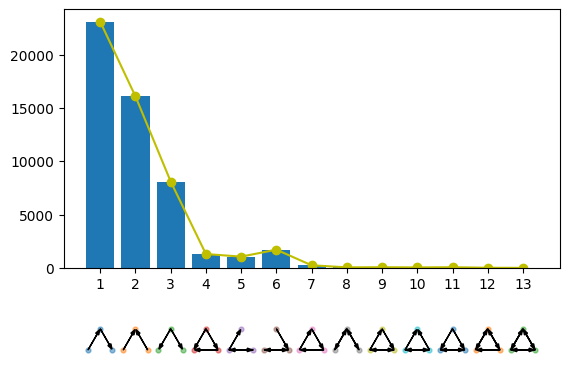

In [15]:
nsv.bar_motifs(motif_frquency, line=motif_frquency)

In [163]:
def plot_z_scores(data, null_model_avg, null_model_std, order=None, title=None):
    z_score = ((data - null_model_avg) / null_model_std) 
    print('Z-score = ', z_score)

    z_score[0] = -1
    z_score[1] = -1
    z_score[2] = -1
    z_score[15] = 0
    
    # normalize the z-score to be between -1 and 1
    z_score_normalized = 1*((z_score-min(z_score))/(max(z_score)-min(z_score))) - 0.5
    print('Normalized Z-score between 0.5 and 0.5 = ', z_score_normalized)

    z_score_normalized[0] = -1
    z_score_normalized[1] = -1
    z_score_normalized[2] = -1
    line = z_score_normalized
    
    default_triad_order = 3 + np.arange(13)
    if order is None:
        order = range(len(line)) if line[0]>-1 else default_triad_order

    x = 1 + np.arange(len(order))

    plt.figure()
    gs = gridspec.GridSpec(2, 1, height_ratios=[10, 3])
    ax0 = plt.subplot(gs[0])
    ax0.plot(x, line[order], '-oy')
    ax0.set_ylim(-0.6,0.6)
    ax0.set_yticks([0.5, 0.3, 0.1, -0.1, -0.3, -0.5])
    print(x)
    plt.xticks(x)
    if title is not None:
        plt.title(title)

    plt.axhline(y=0, color='black', linestyle='-')
        
    ax1 = plt.subplot(gs[1], sharex=ax0)
    nsv.plot_all_triads(order, ax=ax1, label=False)
    plt.axis('off')
    
    return [ax0, ax1]

In [164]:
motif_frequency_DP_avg = [ -1.0, -1.0,
 -1.0,
 27919.307,
 18971.471,
 10384.39,
 152.565,
 177.922,
 251.742,
 49.815,
 1.372,
 2.265,
 1.083,
 1.182,
 0.069,
 0.0]

In [165]:
motif_frequency_DP_std = [0.0,
 0.0,
 0.0,
 117.01947167458925,
 65.83206786209894,
 46.733841057631885,
 12.24776612284869,
 44.883715487913875,
 64.50038322366775,
 7.106389730376459,
 1.4140777913537856,
 1.665165156973926,
 1.0780125231183542,
 1.1058372393801903,
 0.2612259558313454,
 0.0]

Z-score =  [         nan          nan          nan -41.23507764 -43.75483094
 -48.90225045  93.44030483  19.51883864  22.53099792  26.90325288
  32.97414066  34.67223642  37.95595981  53.18865915  38.01689602
          nan]
Normalized Z-score between 0.5 and 0.5 =  [-0.16347204 -0.16347204 -0.16347204 -0.44613577 -0.4638378  -0.5
  0.5        -0.01932092  0.00184042  0.03255685  0.0752067   0.08713634
  0.1102055   0.21721987  0.1106336  -0.15644673]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


/var/folders/cm/6hh6052n6jx303w9j_zcggb40000gn/T/ipykernel_23802/460778172.py:2: RuntimeWarning: invalid value encountered in divide
  z_score = ((data - null_model_avg) / null_model_std)


[<AxesSubplot: >, <AxesSubplot: >]

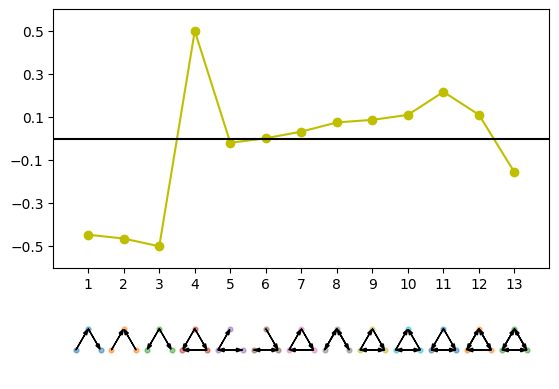

In [166]:
plot_z_scores(motif_frquency, motif_frequency_DP_avg, motif_frequency_DP_std)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


[<AxesSubplot: >, <AxesSubplot: >]

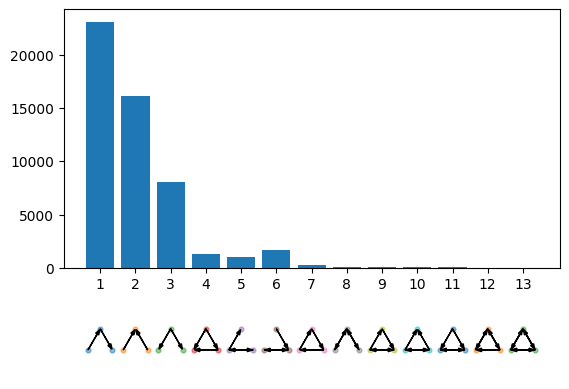

In [8]:
nsv.bar_motifs(motif_frquency)

## Null Model Comparison to Motifs
To see if our results from the motifs is statistically significant, we will compare it to two random model generations

In [7]:
motif_frquency_DP = m.generate_N_DP_graphs_motifs(directed, True, 1000)

In [14]:
#np.savetxt("motif_frequency_1000_DP.txt", motif_frquency_DP)

In [12]:
motif_frequency_DP_avg = []

for i in range(len(motif_frquency_DP)):
    motif_frequency_DP_avg.append(np.mean(motif_frquency_DP[i]))

In [13]:
motif_frequency_DP_avg

[-1.0,
 -1.0,
 -1.0,
 27919.307,
 18971.471,
 10384.39,
 152.565,
 177.922,
 251.742,
 49.815,
 1.372,
 2.265,
 1.083,
 1.182,
 0.069,
 0.0]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


[<AxesSubplot: >, <AxesSubplot: >]

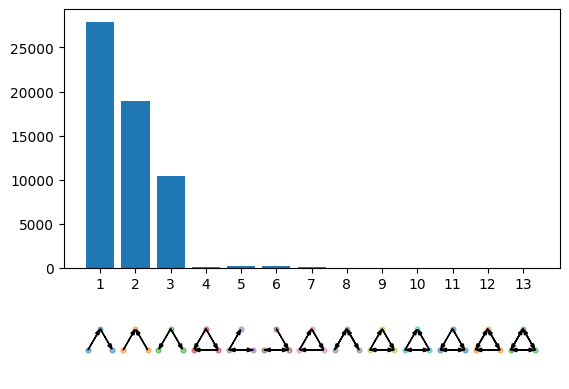

In [21]:
nsv.bar_motifs(np.array(motif_frequency_DP_avg).astype(int))

In [15]:
motif_frequency_DP_std = []

for i in range(len(motif_frquency_DP)):
    motif_frequency_DP_std.append(np.std(motif_frquency_DP[i]))

In [17]:
motif_frequency_DP_std

[0.0,
 0.0,
 0.0,
 117.01947167458925,
 65.83206786209894,
 46.733841057631885,
 12.24776612284869,
 44.883715487913875,
 64.50038322366775,
 7.106389730376459,
 1.4140777913537856,
 1.665165156973926,
 1.0780125231183542,
 1.1058372393801903,
 0.2612259558313454,
 0.0]

In [55]:
motif_frquency

array([   -1,    -1,    -1, 23094, 16091,  8099,  1297,  1054,  1705,
         241,    48,    60,    42,    60,    10,     0])

In [56]:
motif_frequency_DP_avg

[-1.0,
 -1.0,
 -1.0,
 27919.307,
 18971.471,
 10384.39,
 152.565,
 177.922,
 251.742,
 49.815,
 1.372,
 2.265,
 1.083,
 1.182,
 0.069,
 0.0]

In [90]:
((motif_frquency - motif_frequency_DP_avg) / motif_frequency_DP_std) 

/var/folders/cm/6hh6052n6jx303w9j_zcggb40000gn/T/ipykernel_72198/2151189378.py:1: RuntimeWarning: invalid value encountered in divide
  ((motif_frquency - motif_frequency_DP_avg) / motif_frequency_DP_std)


array([         nan,          nan,          nan, -41.23507764,
       -43.75483094, -48.90225045,  93.44030483,  19.51883864,
        22.53099792,  26.90325288,  32.97414066,  34.67223642,
        37.95595981,  53.18865915,  38.01689602,          nan])

In [ ]:
plt.plot(x_axis, y_axis)

In [63]:
len(motif_frquency_DP[2])

1000

In [86]:
result = 0
p_score = np.zeros(16)
for i in range(1000):
    for j in range(16):
        p_score[j] = p_score[j] + theta(motif_frquency_ER[j][i] - motif_frquency[j])

In [87]:
p_score

array([   0.,    0.,    0., 1000., 1000., 1000.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.])

In [65]:
def theta(n):
    if n > 0:
        return 1
    else:
        return 0

In [85]:
nx.algorithms.triads.triadic_census(gn.degree_preserving_graph_from(directed, True))

{'003': 1616044794,
 '012': 12678344,
 '102': 33840,
 '021D': 10432,
 '021U': 19031,
 '021C': 27994,
 '111D': 205,
 '111U': 143,
 '030T': 144,
 '030C': 59,
 '201': 1,
 '120D': 0,
 '120U': 0,
 '120C': 2,
 '210': 0,
 '300': 0}

In [8]:
nx.algorithms.triads.triadic_census(directed)

{'003': 1616337132,
 '012': 12097858,
 '102': 328198,
 '021D': 8099,
 '021U': 16091,
 '021C': 23094,
 '111D': 1705,
 '111U': 1054,
 '030T': 1297,
 '030C': 241,
 '201': 48,
 '120D': 60,
 '120U': 42,
 '120C': 60,
 '210': 10,
 '300': 0}

NameError: name 'x_axis' is not defined

In [22]:
motif_frquency_ER = m.generate_N_ER_graphs_motifs(directed, True, 1000)

In [24]:
#np.savetxt("motif_frequency_1000_ER.txt", motif_frquency_ER)

In [25]:
motif_frequency_ER_avg = []

for i in range(len(motif_frquency_ER)):
    motif_frequency_ER_avg.append(np.mean(motif_frquency_ER[i]))
motif_frequency_ER_avg

[-1.0,
 -1.0,
 -1.0,
 67017.065,
 33515.387,
 33505.689,
 177.046,
 177.446,
 177.064,
 59.076,
 0.215,
 0.475,
 0.241,
 0.265,
 0.001,
 0.0]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


[<AxesSubplot: >, <AxesSubplot: >]

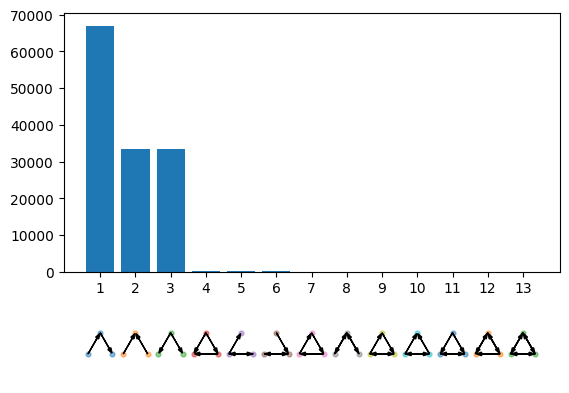

In [27]:
nsv.bar_motifs(np.array(motif_frequency_ER_avg).astype(int))

In [26]:
motif_frequency_ER_std = []

for i in range(len(motif_frquency_ER)):
    motif_frequency_ER_std.append(np.std(motif_frquency_ER[i]))
motif_frequency_ER_std

[0.0,
 0.0,
 0.0,
 1286.1462307121224,
 660.8054579306984,
 660.02305889946,
 14.928492355224622,
 45.75315381479183,
 45.34655338611745,
 7.840805060706458,
 0.45910238509508966,
 0.71510488741163,
 0.4887934123942343,
 0.5260940980471079,
 0.031606961258558226,
 0.0]